In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from ipywidgets import interact
from ml_collections import ConfigDict
from models.ETD_KT_CM_JAX_Vectorised import *
from filters import resamplers
from filters.filter import ParticleFilter
from jax.config import config
config.update("jax_enable_x64", True)

Specify initial setup of the signal, by first loading parameters from the stochastic traveling wave.

In [2]:
signal_params = ConfigDict(KDV_params)
print(signal_params)

Advection_basis_name: none
E: 1
Forcing_basis_name: none
P: 0
S: 0
c_0: 0
c_1: 1
c_2: 0.0
c_3: 1
c_4: 0.0
dt: 2.0e-06
equation_name: KdV
initial_condition: Kassam_Trefethen_KdV_IC_eq3pt1
method: Dealiased_ETDRK4
nx: 256
sigma: 0.0
tmax: 0.01
xmax: 3.141592653589793
xmin: -3.141592653589793



Next, we specify a signal, by choosing a deterministic solver, 

In [3]:
signal_params.update(E=1,method='Dealiased_ETDRK4',nx = 256,P=0,S=0)


Now we continue to define a stochastic ensemble

Now we specify the models, by calling the class.

In [4]:
signal_model = ETD_KT_CM_JAX_Vectorised(signal_params)

initial_signal = initial_condition(signal_model.x, signal_params.E, signal_params.initial_condition)

I0000 00:00:1738783955.009738       1 tfrt_cpu_pjrt_client.cc:349] TfrtCpuClient created.


In [5]:
final, all = signal_model.run(initial_signal, signal_model.nmax,None) #the final input is scan length? 

In [6]:
print(type(all))
print(len(all))
print(all[0].shape) # particles
print(all[1].shape) # signal
#out shape is (n_total, n_particles, n_dim)

<class 'jaxlib.xla_extension.ArrayImpl'>
5000
(1, 256)
(1, 256)


In [7]:
print(initial_signal.shape)
print(all.shape)
signal = jnp.concatenate([initial_signal[None,...], all], axis=0)


(1, 256)
(5000, 1, 256)


In [8]:
def plot(da_step):
    plt.plot(signal_model.x, signal[da_step,0,:], color='k')
    plt.legend(['signal'])
    plt.show()

interact(plot, da_step=(0, signal_model.nmax))

interactive(children=(IntSlider(value=2500, description='da_step', max=5000), Output()), _dom_classes=('widget…

<function __main__.plot(da_step)>

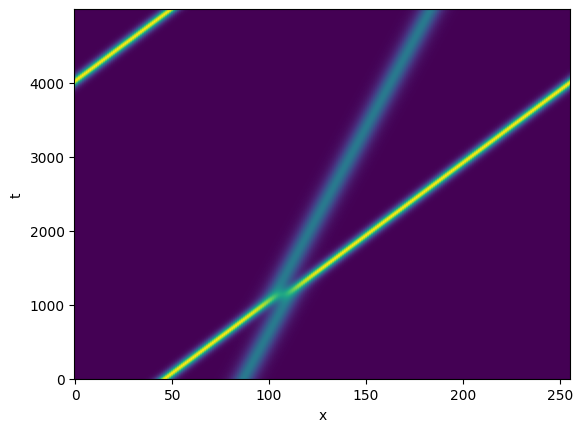

In [9]:
plt.imshow(all[:,0,:], aspect='auto',origin='lower')
plt.xlabel('x')
plt.ylabel('t')
plt.show()